In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt


In [2]:
np.random.seed(42)
num_samples=1000000
experience =np.random.randint(0,10,num_samples)
test_score = np.random.uniform(60,100,num_samples)
interview_score=np.random.uniform(1,10,num_samples)

salary= 3000 * experience + 200 * test_score + 1000 * interview_score + np.random.normal(1000,3000,num_samples)

In [3]:
placement_data=pd.DataFrame({'Experience':experience,'Test_Score':test_score,'Interview_Score':interview_score,'Salary':salary})

In [4]:
X=placement_data[['Experience','Test_Score','Interview_Score']]
y=placement_data['Salary']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)


In [6]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [7]:
y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [11]:
print("Regression Coefficients:")
print("Intercept",model.intercept_)
print("Coefficient",model.coef_)
print("MSE",mse)
print('R2',r2)
print(model.score(X_test, y_test))

Regression Coefficients:
Intercept 997.6892504639691
Coefficient [3001.00074938  199.94751295 1000.2856743 ]
MSE 8986277.086250084
R2 0.9056017239439353
0.9056017239439353


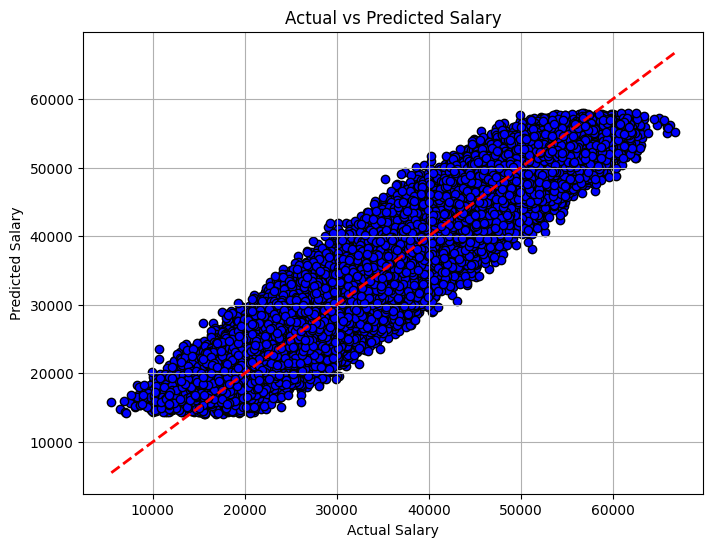

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.grid(True)
plt.show()

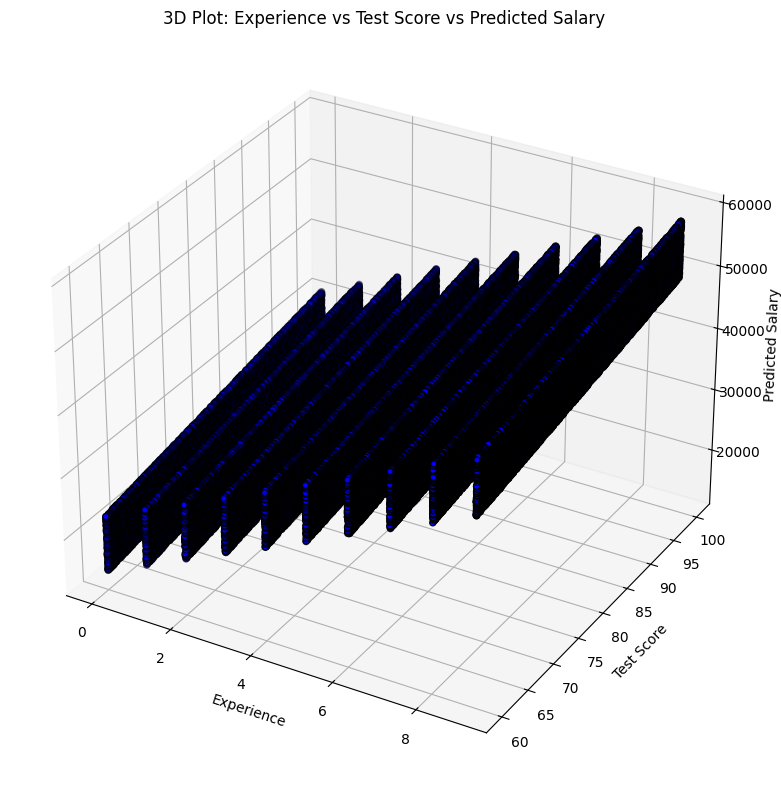

In [13]:
x_feature = X_test['Experience']
y_feature = X_test['Test_Score']
z_target = y_pred  # predicted salary

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(x_feature, y_feature, z_target, c='blue', edgecolors='k')

# Label axes
ax.set_xlabel('Experience')
ax.set_ylabel('Test Score')
ax.set_zlabel('Predicted Salary')
ax.set_title('3D Plot: Experience vs Test Score vs Predicted Salary')

plt.tight_layout()
plt.show()